# Baseline with Hyperparams 

In [1]:
import glob
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")

In [2]:
histories_path = '../models/baseline_exp/histories/'
params_experiment = {}
params_dict = {}
training_dicts = {}
for file in glob.glob(histories_path + "*"):
    params_experiment = {}
    filename = file.split('/')[-1]
    params = filename.split('_')
    params_experiment['filter_size'] = params[1]
    params_experiment['dropout'] = params[2]
    params_experiment['max_word'] = params[3]
    params_experiment['max_seq_len'] = params[4]
    params_dict[filename] = params_experiment
    with open(histories_path + filename, 'rb') as f:
        training_dicts[filename] = pickle.load(f)

In [3]:
best_auc_scores = {}
for filename in training_dicts.keys():
    
    scores = {}
    max_idx = np.argmax(training_dicts[filename]['roc_val'])
    scores['roc_val'] = training_dicts[filename]['roc_val'][max_idx]
    scores['roc_train'] = training_dicts[filename]['roc_train'][max_idx]
    best_auc_scores[filename] = scores    

In [12]:
best_auc_scores

{'baseline_3_2_100000_150_history': {'roc_val': 0.9795235439054121,
  'roc_train': 0.9900086833121738},
 'baseline_5_5_10000_1000_history': {'roc_val': 0.9819945954617119,
  'roc_train': 0.9881207195605205},
 'baseline_3_2_10000_1000_history': {'roc_val': 0.9701634436025764,
  'roc_train': 0.9822211300168354},
 'baseline_5_5_100000_150_history': {'roc_val': 0.9710404451491003,
  'roc_train': 0.9785251378102373},
 'baseline_5_5_10000_150_history': {'roc_val': 0.9625736486429647,
  'roc_train': 0.977419257756207},
 'baseline_5_5_100000_1000_history': {'roc_val': 0.9831499719386604,
  'roc_train': 0.9881623335039523},
 'baseline_5_2_100000_150_history': {'roc_val': 0.9650055263958007,
  'roc_train': 0.9835062841472958},
 'baseline_5_2_100000_1000_history': {'roc_val': 0.9830676528961572,
  'roc_train': 0.9930682334002213},
 'baseline_5_2_10000_1000_history': {'roc_val': 0.9800896478828155,
  'roc_train': 0.9923003124109688},
 'baseline_3_5_10000_1000_history': {'roc_val': 0.96841851930872

In [5]:
dataframe_dict = {}
dataframe_dict['roc_train'] = []
dataframe_dict['roc_val'] = []
dataframe_dict['Filter Size'] = []
dataframe_dict['Vocab Length'] = []
dataframe_dict['Tx'] = []
dataframe_dict['Dropout'] = []
for model in best_auc_scores.keys():
    dataframe_dict['roc_train'].append(best_auc_scores[model]['roc_train'])
    dataframe_dict['roc_val'].append(best_auc_scores[model]['roc_val'])
    dataframe_dict['Filter Size'].append(params_dict[model]['filter_size'])
    dataframe_dict['Vocab Length'].append(params_dict[model]['max_word'])
    dataframe_dict['Tx'].append(params_dict[model]['max_seq_len'])
    dataframe_dict['Dropout'].append(params_dict[model]['dropout'])
    
print(dataframe_dict)

{'roc_train': [0.9900086833121738, 0.9881207195605205, 0.9822211300168354, 0.9785251378102373, 0.977419257756207, 0.9881623335039523, 0.9835062841472958, 0.9930682334002213, 0.9923003124109688, 0.9744543793938286, 0.9756424156545219, 0.9892803941953221, 0.9870604384641709, 0.9821237252072254, 0.9816939492073349, 0.9869949108169425], 'roc_val': [0.9795235439054121, 0.9819945954617119, 0.9701634436025764, 0.9710404451491003, 0.9625736486429647, 0.9831499719386604, 0.9650055263958007, 0.9830676528961572, 0.9800896478828155, 0.9684185193087257, 0.9711400825512354, 0.9810030236970633, 0.9809618375015452, 0.9709032501991821, 0.9625140565478972, 0.9813123318992697], 'Filter Size': ['3', '5', '3', '5', '5', '5', '5', '5', '5', '3', '3', '3', '3', '3', '5', '3'], 'Vocab Length': ['100000', '10000', '10000', '100000', '10000', '100000', '100000', '100000', '10000', '10000', '100000', '10000', '100000', '100000', '10000', '10000'], 'Tx': ['150', '1000', '1000', '150', '150', '1000', '150', '1000'

In [6]:
experiment_df = pd.DataFrame(dataframe_dict)
experiment_df.head()

,roc_train,roc_val,Filter Size,Vocab Length,Tx,Dropout
0,0.990009,0.979524,3,100000,150,2
1,0.988121,0.981995,5,10000,1000,5
2,0.982221,0.970163,3,10000,1000,2
3,0.978525,0.971040,5,100000,150,5
4,0.977419,0.962574,5,10000,150,5


Text(0.5, 0, 'ROC-AUC')

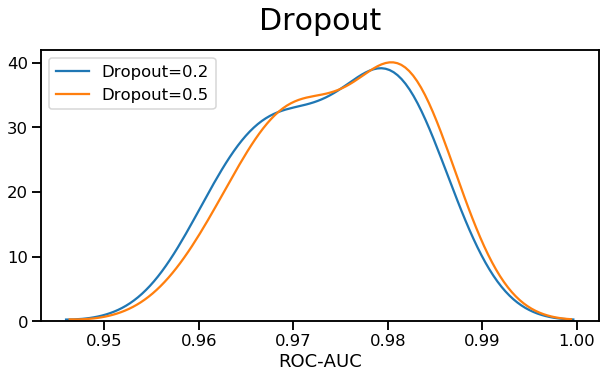

In [21]:
plt.figure(figsize=(10, 5))
sns.kdeplot(experiment_df[experiment_df['Dropout'] == '2']['roc_val'], label='Dropout=0.2')
sns.kdeplot(experiment_df[experiment_df['Dropout'] == '5']['roc_val'], label='Dropout=0.5')
plt.title(u'Dropout', fontsize=30, y=1.05)
plt.xlabel('ROC-AUC')

Text(0.5, 0, 'ROC-AUC')

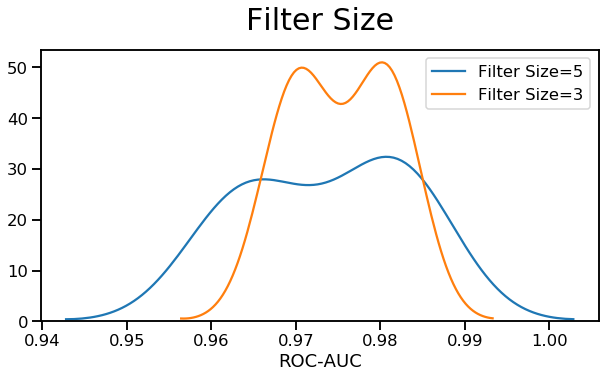

In [22]:
plt.figure(figsize=(10, 5))
sns.kdeplot(experiment_df[experiment_df['Filter Size'] == '5']['roc_val'], label='Filter Size=5')
sns.kdeplot(experiment_df[experiment_df['Filter Size'] == '3']['roc_val'], label='Filter Size=3')
plt.title(u'Filter Size', fontsize=30, y=1.05)
plt.xlabel('ROC-AUC')

Text(0.5, 0, 'ROC-AUC')

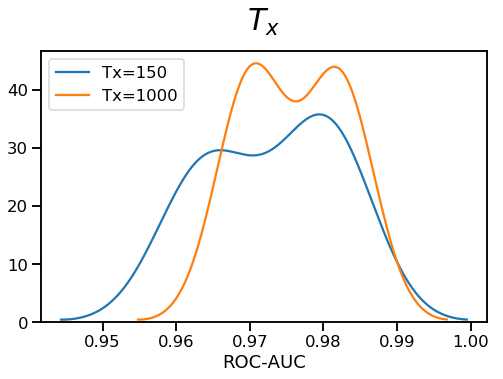

In [17]:
plt.figure(figsize=(8, 5))
sns.kdeplot(experiment_df[experiment_df.Tx == '150']['roc_val'], label='Tx=150')
sns.kdeplot(experiment_df[experiment_df.Tx == '1000']['roc_val'], label='Tx=1000')
plt.title(u'$T_x$', fontsize=30, y=1.05)
plt.xlabel('ROC-AUC')

Text(0.5, 0, 'ROC-AUC')

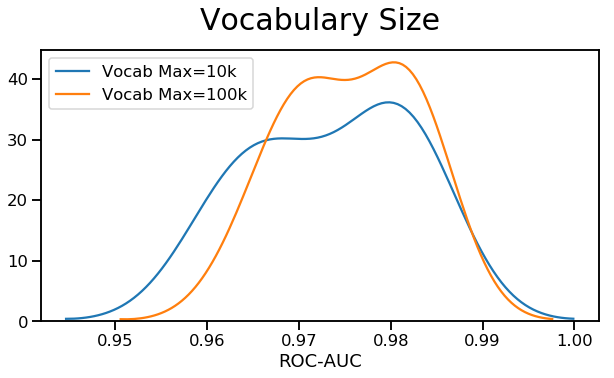

In [19]:
plt.figure(figsize=(10, 5))
sns.kdeplot(experiment_df[experiment_df['Vocab Length'] == '10000']['roc_val'], label='Vocab Max=10k')
sns.kdeplot(experiment_df[experiment_df['Vocab Length'] == '100000']['roc_val'], label='Vocab Max=100k')
plt.title(u'Vocabulary Size', fontsize=30, y=1.05)
plt.xlabel('ROC-AUC')

In [9]:
worst_model = None
worst_score = 1

for model in best_auc_scores.keys():
    
    score = best_auc_scores[model]['roc_val']
    
    if score < worst_score:
        worst_model = model
        worst_score = score
        
print(worst_model)
print(worst_score)

baseline_5_2_10000_150_history
0.9625140565478972


In [10]:
best_model = None
best_score = 0

for model in best_auc_scores.keys():
    
    score = best_auc_scores[model]['roc_val']
    
    if score > best_score:
        best_model = model
        best_score = score
        
print(best_model)
print(best_score)

baseline_5_5_100000_1000_history
0.9831499719386604


## Vocabulary Size Dependance

In [11]:
vocab_100k = []
vocab_10k = []

for model in params_dict.keys():
    params = params_dict[model]
    if params['max_word'] == '100000':
        vocab_100k.append(model)
    else:
        vocab_10k.append(model)
print(vocab_100k)
print(vocab_10k)

['baseline_3_2_100000_150_history', 'baseline_5_5_100000_150_history', 'baseline_5_5_100000_1000_history', 'baseline_5_2_100000_150_history', 'baseline_5_2_100000_1000_history', 'baseline_3_5_100000_1000_history', 'baseline_3_5_100000_150_history', 'baseline_3_2_100000_1000_history']
['baseline_5_5_10000_1000_history', 'baseline_3_2_10000_1000_history', 'baseline_5_5_10000_150_history', 'baseline_5_2_10000_1000_history', 'baseline_3_5_10000_1000_history', 'baseline_3_2_10000_150_history', 'baseline_5_2_10000_150_history', 'baseline_3_5_10000_150_history']


## Filter Dependance

In [13]:
filter_5 = []
filter_3 = []

for model in params_dict.keys():
    params = params_dict[model]
    if params['filter_size'] == '5':
        filter_5.append(model)
    else:
        filter_3.append(model)
print(filter_5)
print(filter_3)

['baseline_5_5_10000_150_history', 'baseline_5_2_100000_150_history', 'baseline_5_2_100000_1000_history', 'baseline_5_2_10000_1000_history', 'baseline_5_2_10000_150_history']
['baseline_3_2_100000_150_history', 'baseline_3_2_10000_1000_history', 'baseline_3_5_10000_1000_history', 'baseline_3_5_100000_1000_history', 'baseline_3_2_10000_150_history', 'baseline_3_5_100000_150_history', 'baseline_3_2_100000_1000_history', 'baseline_3_5_10000_150_history']


## Dropout Dependance

In [14]:
dropout_2 = []
dropout_5 = []

for model in params_dict.keys():
    params = params_dict[model]
    if params['dropout'] == '2':
        dropout_2.append(model)
    else:
        dropout_5.append(model)
print(dropout_2)
print(dropout_5)

['baseline_3_2_100000_150_history', 'baseline_3_2_10000_1000_history', 'baseline_5_2_100000_150_history', 'baseline_5_2_100000_1000_history', 'baseline_5_2_10000_1000_history', 'baseline_3_2_10000_150_history', 'baseline_3_2_100000_1000_history', 'baseline_5_2_10000_150_history']
['baseline_5_5_10000_150_history', 'baseline_3_5_10000_1000_history', 'baseline_3_5_100000_1000_history', 'baseline_3_5_100000_150_history', 'baseline_3_5_10000_150_history']


## $T_x$ Dependance

In [15]:
tx_1000 = []
tx_150 = []

for model in params_dict.keys():
    params = params_dict[model]
    if params['max_seq_len'] == '1000':
        tx_1000.append(model)
    else:
        tx_150.append(model)
print(tx_1000)
print(tx_150)

['baseline_3_2_10000_1000_history', 'baseline_5_2_100000_1000_history', 'baseline_5_2_10000_1000_history', 'baseline_3_5_10000_1000_history', 'baseline_3_5_100000_1000_history', 'baseline_3_2_100000_1000_history']
['baseline_3_2_100000_150_history', 'baseline_5_5_10000_150_history', 'baseline_5_2_100000_150_history', 'baseline_3_2_10000_150_history', 'baseline_3_5_100000_150_history', 'baseline_5_2_10000_150_history', 'baseline_3_5_10000_150_history']


In [ ]:
tx_df = pd.DataFrame()
tx_df['']